### 통계청 출생아수 시각화

In [1]:
import pandas as pd
df_kosis = pd.read_csv('출생아수_시도_시_군_구__20220305113211.csv',encoding='cp949')
df_kosis.head()

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,...,2020.09.2,2020.10,2020.10.1,2020.10.2,2020.11,2020.11.1,2020.11.2,2020.12,2020.12.1,2020.12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,63268,33266,30002,58144,30086,28058,62160,32333,29827,...,11552,21884,11172,10712,20054,10300,9754,19641,10028,9613
2,서울특별시,13205,6886,6319,12239,6224,6015,13358,6947,6411,...,2024,3870,2021,1849,3469,1789,1680,3428,1760,1668
3,부산광역시,4201,2260,1941,3910,2104,1806,4304,2234,2070,...,649,1185,571,614,1041,550,491,1025,529,496
4,대구광역시,3345,1764,1581,2994,1608,1386,3337,1815,1522,...,459,901,460,441,771,382,389,721,364,357


In [2]:
df_kosis.shape

(19, 865)

### 데이터 전처리

In [3]:
df = df_kosis.melt(id_vars='시군구별')
df.head()

,시군구별,variable,value
0,시군구별,1997.01,계 (명)
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345


In [4]:
df['시군구별'].unique()

array(['시군구별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [5]:
# 불리언 인덱싱을 데이터 프레임으로 보는 방법
df[df['시군구별'] == '시군구별']

,시군구별,variable,value
0,시군구별,1997.01,계 (명)
19,시군구별,1997.01.1,남자 (명)
38,시군구별,1997.01.2,여자 (명)
57,시군구별,1997.02,계 (명)
76,시군구별,1997.02.1,남자 (명)
...,...,...,...
16321,시군구별,2020.11.1,남자 (명)
16340,시군구별,2020.11.2,여자 (명)
16359,시군구별,2020.12,계 (명)
16378,시군구별,2020.12.1,남자 (명)


In [6]:
# 필요 없는 컬럼 제거
print(df.shape)
df = df[df['시군구별'] != '시군구별'].copy()
df.shape

(16416, 3)


(15552, 3)

In [7]:
df['시군구별'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [8]:
# 년도, 월, 성별, 텍스트 데이터 전처리
df['variable']

1          1997.01
2          1997.01
3          1997.01
4          1997.01
5          1997.01
           ...    
16411    2020.12.2
16412    2020.12.2
16413    2020.12.2
16414    2020.12.2
16415    2020.12.2
Name: variable, Length: 15552, dtype: object

In [9]:
# 남/녀/전체 구분
# expand='True' 를 하면 스플릿 한 부분대로 나눠서 데이터 프레임을 만듬
df['연도'] = df['variable'].str.split('.', expand=True)[0]
df['월'] = df['variable'].str.split('.', expand=True)[1]

# 0(None)=전체, 1=남자, 2=여자
df['성별'] = df['variable'].str.split('.', expand=True)[2]
df.head()

,시군구별,variable,value,연도,월,성별
1,전국,1997.01,63268,1997,01,None
2,서울특별시,1997.01,13205,1997,01,None
3,부산광역시,1997.01,4201,1997,01,None
4,대구광역시,1997.01,3345,1997,01,None
5,인천광역시,1997.01,3646,1997,01,None


In [10]:
df['성별'].unique()

array([None, '1', '2'], dtype=object)

In [11]:
# None값 처리
df['성별'] = df['성별'].fillna('전체')
df.head()

,시군구별,variable,value,연도,월,성별
1,전국,1997.01,63268,1997,01,전체
2,서울특별시,1997.01,13205,1997,01,전체
3,부산광역시,1997.01,4201,1997,01,전체
4,대구광역시,1997.01,3345,1997,01,전체
5,인천광역시,1997.01,3646,1997,01,전체


In [12]:
# 번호 처리
df['성별'] = df['성별'].replace('1', '남자').replace('2','여자')
df['성별'].unique()

array(['전체', '남자', '여자'], dtype=object)

In [13]:
df['성별'].value_counts()

전체    5184
남자    5184
여자    5184
Name: 성별, dtype: int64

In [14]:
# 컬럼명 rename 처리
df = df.rename(columns={'variable':'기간','value':'출생아수'})
df.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268,1997,01,전체
2,서울특별시,1997.01,13205,1997,01,전체
3,부산광역시,1997.01,4201,1997,01,전체
4,대구광역시,1997.01,3345,1997,01,전체
5,인천광역시,1997.01,3646,1997,01,전체


### 분석 및 시각화

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15552 entries, 1 to 16415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    15552 non-null  object
 1   기간      15552 non-null  object
 2   출생아수    15552 non-null  object
 3   연도      15552 non-null  object
 4   월       15552 non-null  object
 5   성별      15552 non-null  object
dtypes: object(6)
memory usage: 850.5+ KB


In [16]:
import numpy as np
# 출생아수 수치형 변환
# df['출생아수'].astype(int) # 오류를 처리해야 한다
df['출생아수'] = df['출생아수'].replace('-', np.nan)
df['출생아수'] = df['출생아수'].astype(float)
df['출생아수'].describe()

count    15012.000000
mean      3012.725286
std       6587.701782
min         30.000000
25%        621.000000
50%       1025.000000
75%       1908.250000
max      63268.000000
Name: 출생아수, dtype: float64

In [17]:
# import numpy as np
# # 출생아수 수치형 변환
# # df['출생아수'].astype(int) # 오류를 처리해야 한다
# df['출생아수'] = df['출생아수'].replace('-', 0)
# df['출생아수'] = df['출생아수'].astype(float)
# df['출생아수'].describe()

In [18]:
# 전체 지역 분석
df_all = df[(df['시군구별'] == '전국') & (df['성별']=='전체')]
df_all.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
58,전국,1997.02,58144.0,1997,02,전체
115,전국,1997.03,62160.0,1997,03,전체
172,전국,1997.04,56949.0,1997,04,전체
229,전국,1997.05,55270.0,1997,05,전체


In [19]:
df_all = df_all[['연도','월','출생아수']].copy()
df_all

,연도,월,출생아수
1,1997,01,63268.0
58,1997,02,58144.0
115,1997,03,62160.0
172,1997,04,56949.0
229,1997,05,55270.0
...,...,...,...
16132,2020,08,22402.0
16189,2020,09,23499.0
16246,2020,10,21884.0
16303,2020,11,20054.0


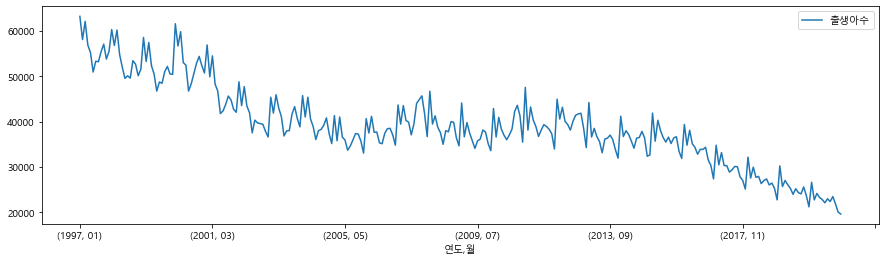

In [20]:
# 시각화
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic' )
df_all.set_index(['연도','월']).plot(figsize=(15,4));

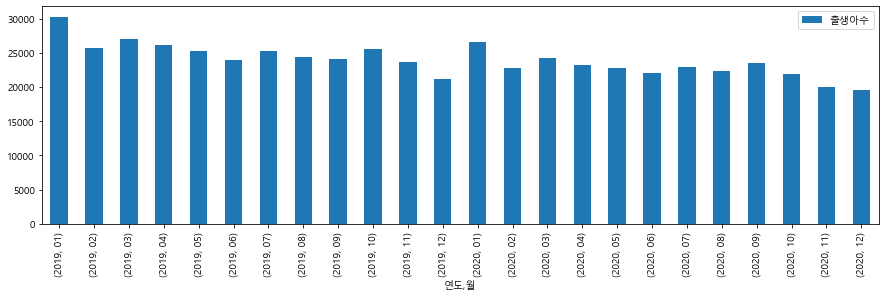

In [21]:
df_all[-24:].set_index(['연도','월']).plot.bar(figsize=(15,4));

In [22]:
df_all

,연도,월,출생아수
1,1997,01,63268.0
58,1997,02,58144.0
115,1997,03,62160.0
172,1997,04,56949.0
229,1997,05,55270.0
...,...,...,...
16132,2020,08,22402.0
16189,2020,09,23499.0
16246,2020,10,21884.0
16303,2020,11,20054.0


<AxesSubplot:xlabel='연도', ylabel='출생아수'>

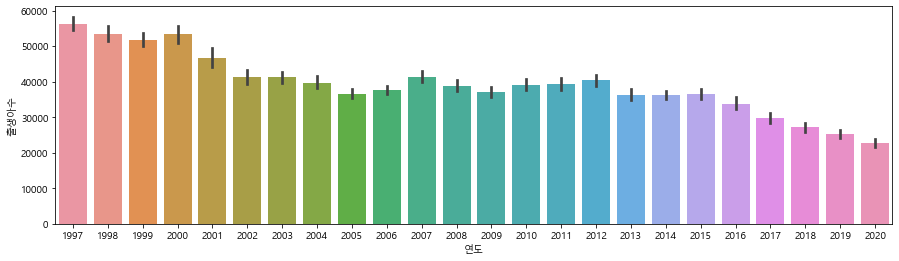

In [23]:
import seaborn as sns
plt.figure(figsize=(15,4))
sns.barplot(data=df_all, x='연도', y='출생아수')

<AxesSubplot:xlabel='연도', ylabel='출생아수'>

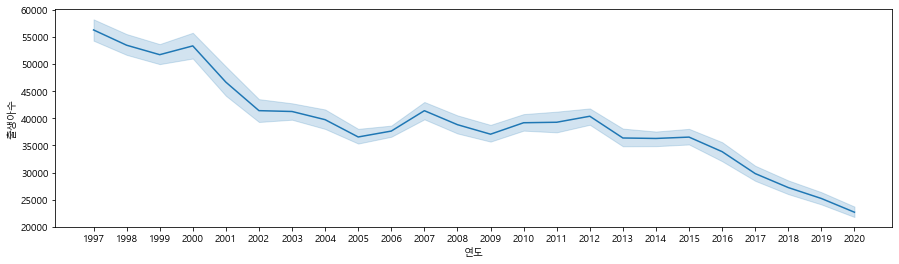

In [24]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_all, x='연도', y='출생아수')

<AxesSubplot:xlabel='연도', ylabel='출생아수'>

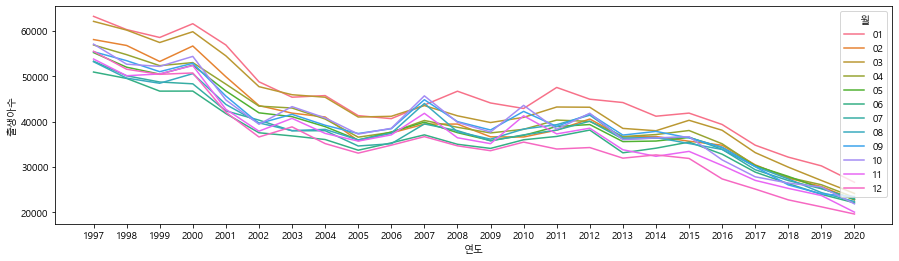

In [25]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_all, x='연도', y='출생아수', hue='월')

In [26]:
# 지역별 분석
df_local = df[df['시군구별'] != '전국'].copy()
df_local

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997.01,13205.0,1997,01,전체
3,부산광역시,1997.01,4201.0,1997,01,전체
4,대구광역시,1997.01,3345.0,1997,01,전체
5,인천광역시,1997.01,3646.0,1997,01,전체
6,광주광역시,1997.01,2166.0,1997,01,전체
...,...,...,...,...,...,...
16411,전라북도,2020.12.2,326.0,2020,12,여자
16412,전라남도,2020.12.2,351.0,2020,12,여자
16413,경상북도,2020.12.2,431.0,2020,12,여자
16414,경상남도,2020.12.2,539.0,2020,12,여자


<AxesSubplot:xlabel='연도', ylabel='출생아수'>

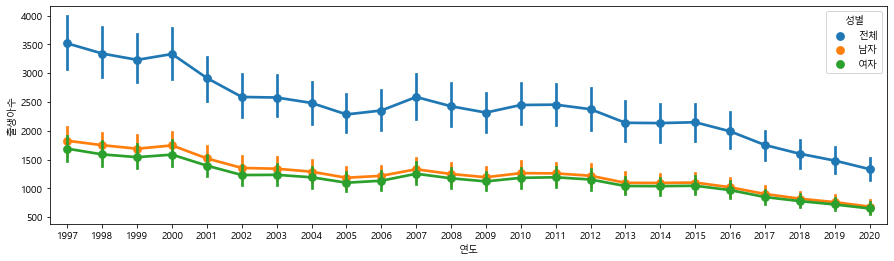

In [27]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_local, x='연도', y='출생아수', hue='성별')

In [28]:
df_local_all = df_local[df_local['성별'] == '전체']

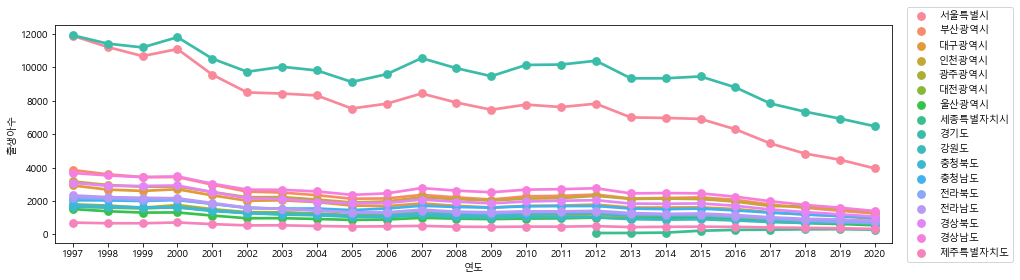

In [29]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_local_all, x='연도', y='출생아수', hue='시군구별', ci=None)
plt.legend(loc='center right', bbox_to_anchor=(1.15, 0.5), ncol=1)

In [32]:
df_local_2 = df_local_all[df_local_all['시군구별'].isin(['서울특별시', '경기도', '세종특별자치시'])]
df_local_2.head()

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997.01,13205.0,1997,01,전체
9,세종특별자치시,1997.01,NaN,1997,01,전체
10,경기도,1997.01,13440.0,1997,01,전체
59,서울특별시,1997.02,12239.0,1997,02,전체
66,세종특별자치시,1997.02,NaN,1997,02,전체


<AxesSubplot:xlabel='연도', ylabel='출생아수'>

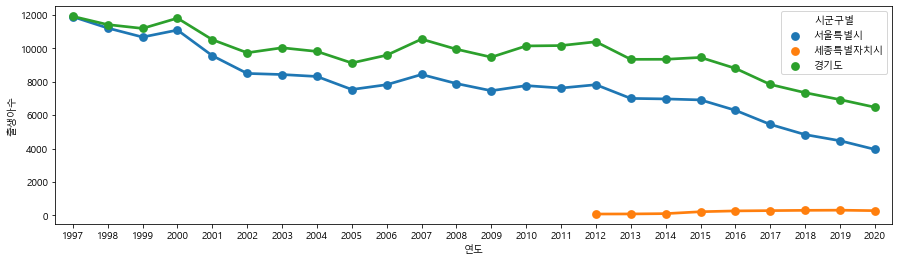

In [34]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_local_2, x='연도', y='출생아수', ci=None, hue='시군구별')

In [37]:
df_sj = df[df['시군구별'] == '세종특별자치시'].dropna(how='')
df_sj

,시군구별,기간,출생아수,연도,월,성별
9,세종특별자치시,1997.01,NaN,1997,01,전체
28,세종특별자치시,1997.01.1,NaN,1997,01,남자
47,세종특별자치시,1997.01.2,NaN,1997,01,여자
66,세종특별자치시,1997.02,NaN,1997,02,전체
85,세종특별자치시,1997.02.1,NaN,1997,02,남자
...,...,...,...,...,...,...
16330,세종특별자치시,2020.11.1,124.0,2020,11,남자
16349,세종특별자치시,2020.11.2,133.0,2020,11,여자
16368,세종특별자치시,2020.12,243.0,2020,12,전체
16387,세종특별자치시,2020.12.1,128.0,2020,12,남자


<AxesSubplot:xlabel='연도', ylabel='출생아수'>

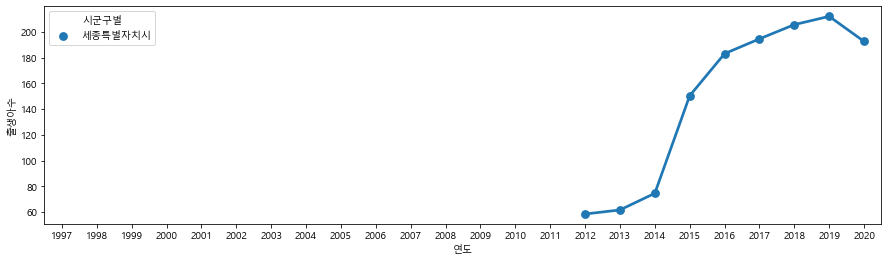

In [36]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_sj, x='연도', y='출생아수', ci=None, hue='시군구별')